# Background

### Data description

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

### Objective
The classification goal is to predict if the client will subscribe
(yes/no) a term deposit (variable y)

# Importing Packages

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from IPython.display import Image
from os import system

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
#import pydotplus
#import granphviz
from statistics import median, mean

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, precision_score, recall_score

In [6]:
data = pd.read_csv ('bank-full.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


# EDA

### Shape

In [8]:
data.shape

(45211, 17)

### Datatype

In [11]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

7 variable are integers
10 variable are in string


### Convert to categorical variable 

In [13]:
data[['job','marital','education','default', 'housing', 'loan','contact', 'month', 'poutcome', 'Target']] = data[['job','marital','education','default', 'housing', 'loan','contact', 'month', 'poutcome', 'Target']].apply(pd.Categorical)

In [14]:
data.dtypes.to_frame('Datatypes of Attributes').T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of Attributes,int64,category,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


### Check presence of missing values

In [17]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [18]:
data.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [19]:
data.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [20]:
data.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [21]:
data.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [22]:
data.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

### Five Point Summary

In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


Outliers are present in age, balance, duration, campaign, pdays and previous features. 

### Distribution of numerical features

C:\Users\jeffr\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\jeffr\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
<ipython-input-36-6e7cb8a818c6>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


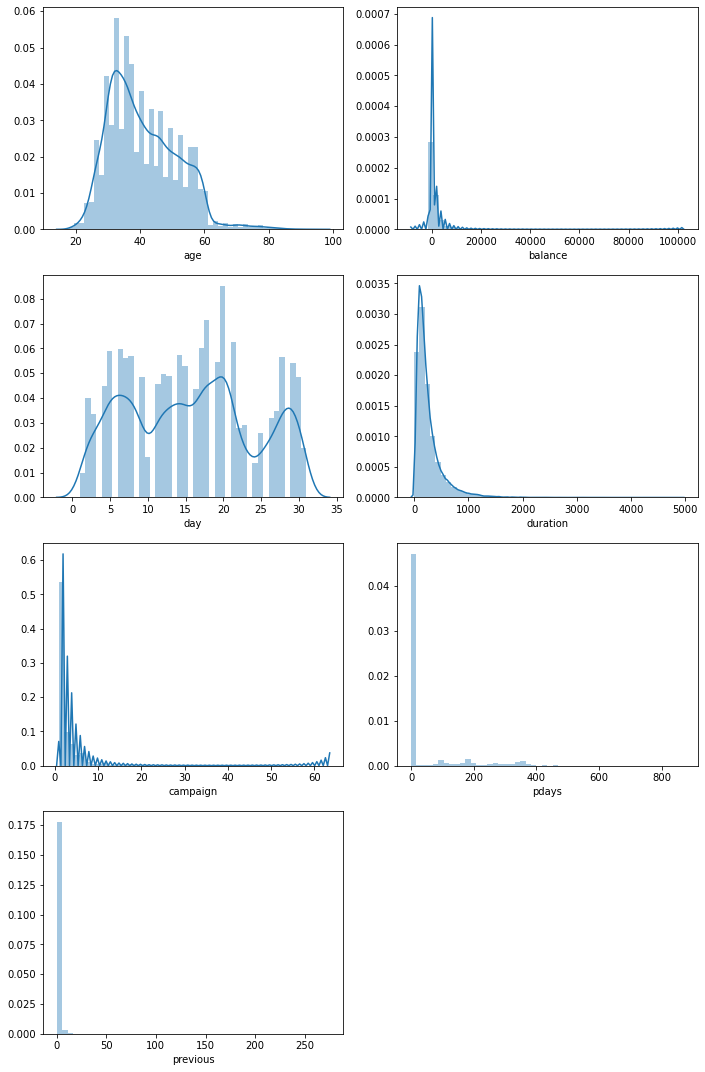

In [36]:
fig, ax = plt.subplots (nrows=4, ncols=2, figsize=(10,15))
ax = ax.flatten()

sns.distplot (data['age'],ax=ax[0])
sns.distplot (data['balance'],ax=ax[1])
sns.distplot (data['day'],ax=ax[2])
sns.distplot (data['duration'],ax=ax[3])
sns.distplot (data['campaign'],ax=ax[4])
sns.distplot (data['pdays'],ax=ax[5])
sns.distplot (data['previous'],ax=ax[6])

fig.tight_layout()
fig.show()
ax.flat[-1].set_visible(False)

### Distribution of categorical features

<ipython-input-34-0132e882f34e>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


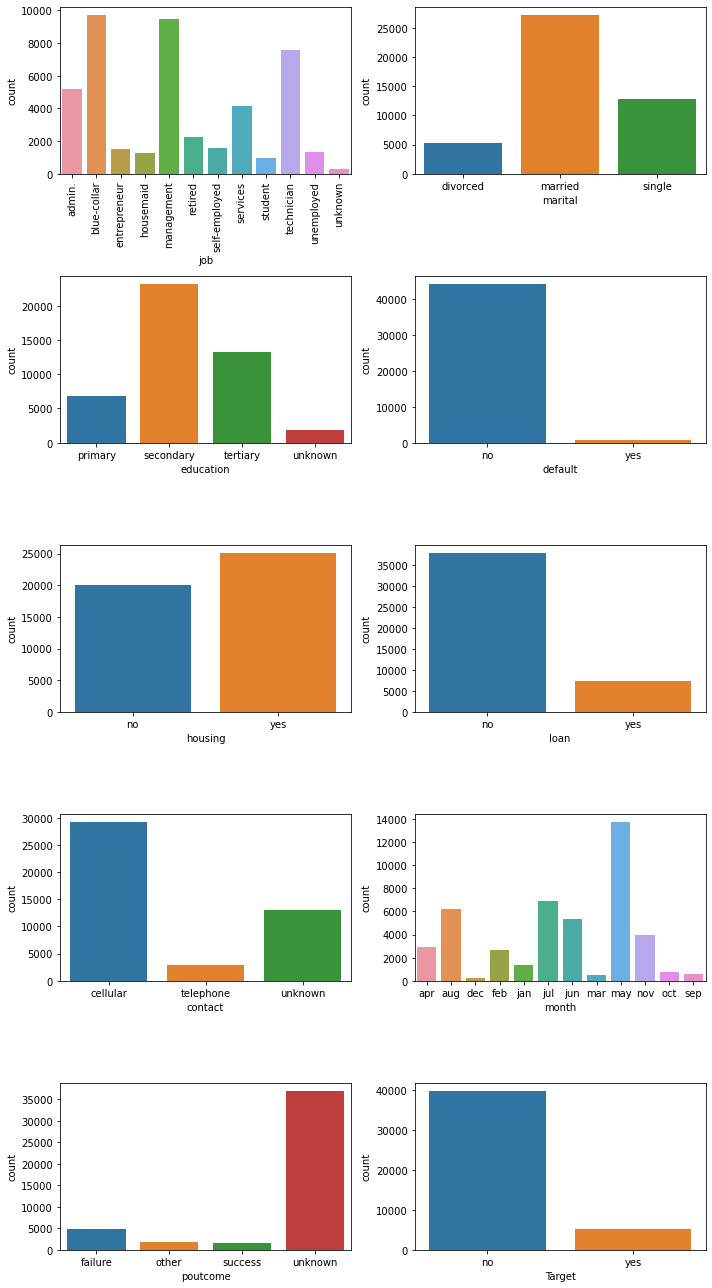

In [34]:
fig, ax = plt.subplots (nrows=5, ncols=2, figsize=(10,18))
ax = ax.flatten()
plot = sns.countplot(x=data['job'], data=data, ax=ax[0])
plt.setp(plot.get_xticklabels(), rotation=90)

sns.countplot(x=data['marital'], data=data, ax=ax[1])
sns.countplot(x=data['education'], data=data, ax=ax[2])
sns.countplot(x=data['default'], data=data, ax=ax[3])
sns.countplot(x=data['housing'], data=data, ax=ax[4])
sns.countplot(x=data['loan'], data=data, ax=ax[5])
sns.countplot(x=data['contact'], data=data, ax=ax[6])
sns.countplot(x=data['month'], data=data, ax=ax[7])
sns.countplot(x=data['poutcome'], data=data, ax=ax[8])
sns.countplot(x=data['Target'], data=data, ax=ax[9])

fig.tight_layout()
fig.show()

More than 90% customers have not defaulted credit.

Around 90% customers have not subscribed for the term deposit.

Most customers have been contacted in the month of May and through cellular phones.

Number of customers who have housing loan is higher than those who don't have.

### Measure of skewness of numerical features

In [35]:
data.skew().to_frame('Skewness Measure').T

,age,balance,day,duration,campaign,pdays,previous
Skewness Measure,0.684818,8.360308,0.093079,3.144318,4.89865,2.615715,41.846454


### Outliers

<ipython-input-37-7c022e60796f>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


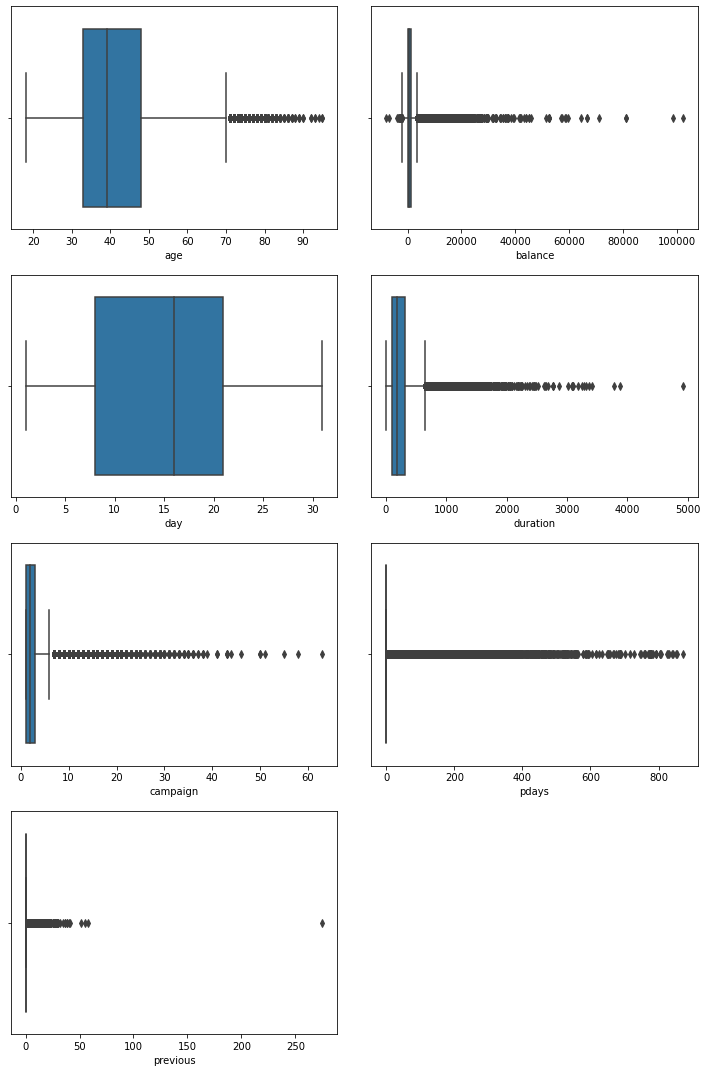

In [37]:
fig, ax = plt.subplots (nrows=4, ncols=2, figsize=(10,15))
ax = ax.flatten()

sns.boxplot (x='age', data=data, ax=ax[0])
sns.boxplot (x='balance', data=data, ax=ax[1])
sns.boxplot (x='day', data=data, ax=ax[2])
sns.boxplot (x='duration', data=data, ax=ax[3])
sns.boxplot (x='campaign', data=data, ax=ax[4])
sns.boxplot (x='pdays', data=data, ax=ax[5])
sns.boxplot (x='previous', data=data, ax=ax[6])

fig.tight_layout()
fig.show()
ax.flat[-1].set_visible(False)

All features have outliers except in age

In [39]:
data.Target.value_counts().to_frame('Target Distribution').T

,no,yes
Target Distribution,39922,5289


### Label Encoding

In [44]:
df = data.copy()
encoder = LabelEncoder()

df['marital']= encoder.fit_transform(df['marital']).astype(int)
df['education']= encoder.fit_transform(df['education']).astype(int)
df['default']= encoder.fit_transform(df['default']).astype(int)
df['housing']= encoder.fit_transform(df['housing']).astype(int)
df['loan']= encoder.fit_transform(df['loan']).astype(int)
df['month']= encoder.fit_transform(df['month']).astype(int)
df['poutcome']= encoder.fit_transform(df['poutcome']).astype(int)
df['Target']= encoder.fit_transform(df['Target']).astype(int)

df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,2143,1,0,unknown,5,8,261,1,-1,0,3,0
1,44,technician,2,1,0,29,1,0,unknown,5,8,151,1,-1,0,3,0
2,33,entrepreneur,1,1,0,2,1,1,unknown,5,8,76,1,-1,0,3,0
3,47,blue-collar,1,3,0,1506,1,0,unknown,5,8,92,1,-1,0,3,0
4,33,unknown,2,3,0,1,0,0,unknown,5,8,198,1,-1,0,3,0


In [46]:
df[['job','marital','education','default', 'housing', 'loan','contact', 'month', 'poutcome', 'Target']] = df[['job','marital','education','default', 'housing', 'loan','contact', 'month', 'poutcome', 'Target']].apply(pd.Categorical)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


### Handling Outliers with Mean Replacement

In [52]:
meanbal = float (df['balance'].mean())
df['balance'] = np.where(df['balance']>np.percentile(df['balance'],75),meanbal,df['balance'])

meandur = float (df['duration'].mean())
df['duration'] = np.where(df['duration']>np.percentile(df['duration'],75),meanbal,df['duration'])

meancam = float (df['campaign'].mean())
df['campaign'] = np.where(df['campaign']>np.percentile(df['campaign'],75),meanbal,df['campaign'])

meanpdays = float (df['pdays'].mean())
df['pdays'] = np.where(df['pdays']>np.percentile(df['pdays'],75),meanbal,df['pdays'])

meanpre = float (df['previous'].mean())
df['previous'] = np.where(df['previous']>np.percentile(df['previous'],75),meanbal,df['previous'])

<ipython-input-53-344e6b137753>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


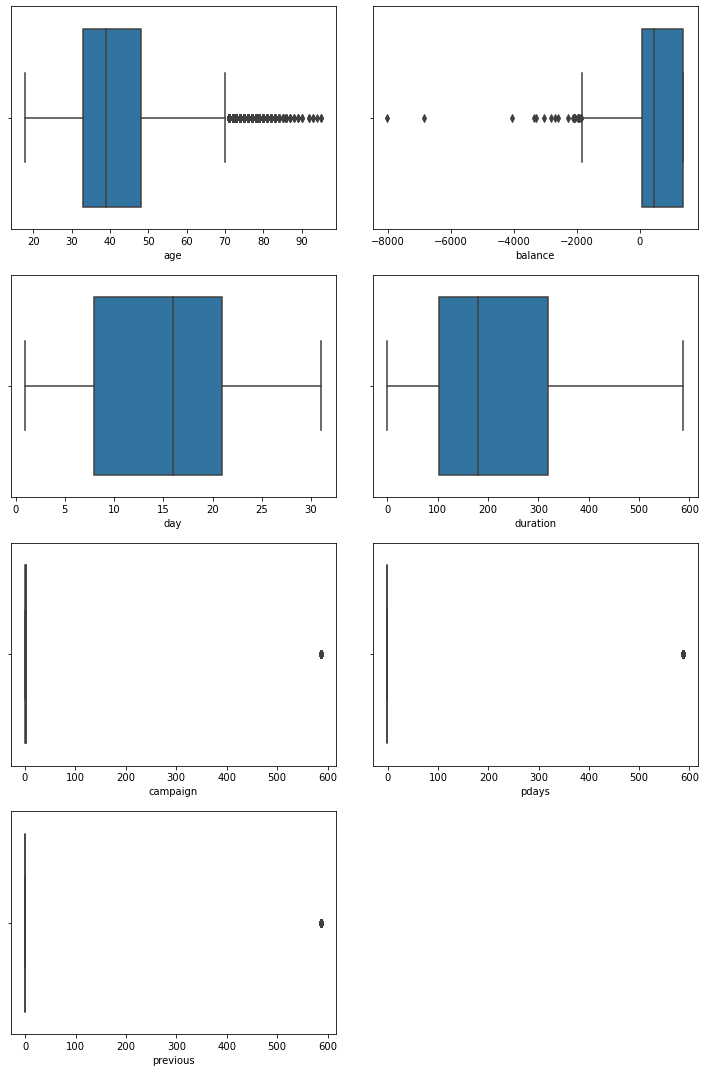

In [53]:
fig, ax = plt.subplots (nrows=4, ncols=2, figsize=(10,15))
ax = ax.flatten()

sns.boxplot (x='age', data=df, ax=ax[0])
sns.boxplot (x='balance', data=df, ax=ax[1])
sns.boxplot (x='day', data=df, ax=ax[2])
sns.boxplot (x='duration', data=df, ax=ax[3])
sns.boxplot (x='campaign', data=df, ax=ax[4])
sns.boxplot (x='pdays', data=df, ax=ax[5])
sns.boxplot (x='previous', data=df, ax=ax[6])

fig.tight_layout()
fig.show()
ax.flat[-1].set_visible(False)

### Correlation Plot of all Features

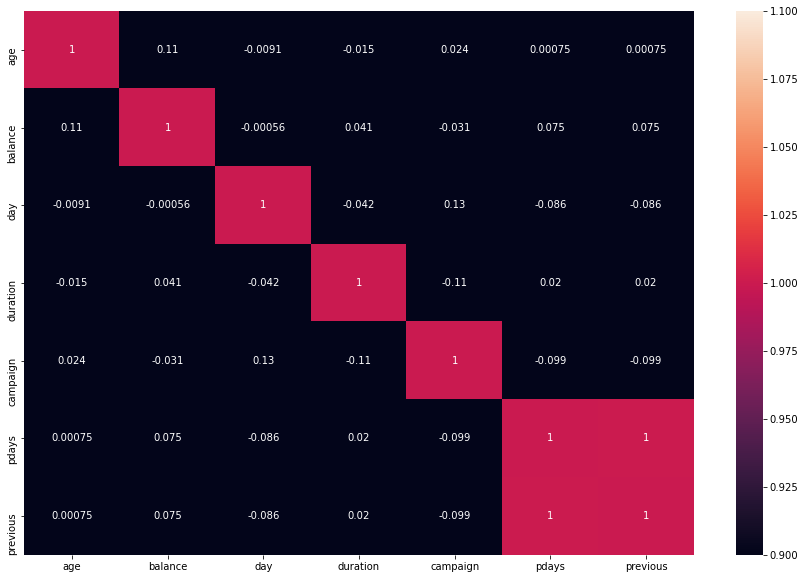

In [54]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, vmax=1, vmin=1)

pdays and previous are highly correlated features

### Dropping Columns

'pdays' and 'previous' are highly correlated, so removing 'pdays'.

'job','education' and 'contact' attributes contain multiple unknown values.

'day' and 'month' of contact will not have any realtionship with customer opting for subscription.

In [55]:
df2 = df.drop (['job','education','contact','duration','pdays','day','month'], axis=1)
df2.head()

,age,marital,default,balance,housing,loan,campaign,previous,poutcome,Target
0,58,1,0,1362.272058,1,0,1.0,0.0,3,0
1,44,2,0,29.000000,1,0,1.0,0.0,3,0
2,33,1,0,2.000000,1,1,1.0,0.0,3,0
3,47,1,0,1362.272058,1,0,1.0,0.0,3,0
4,33,2,0,1.000000,0,0,1.0,0.0,3,0


### Pairplot of the features

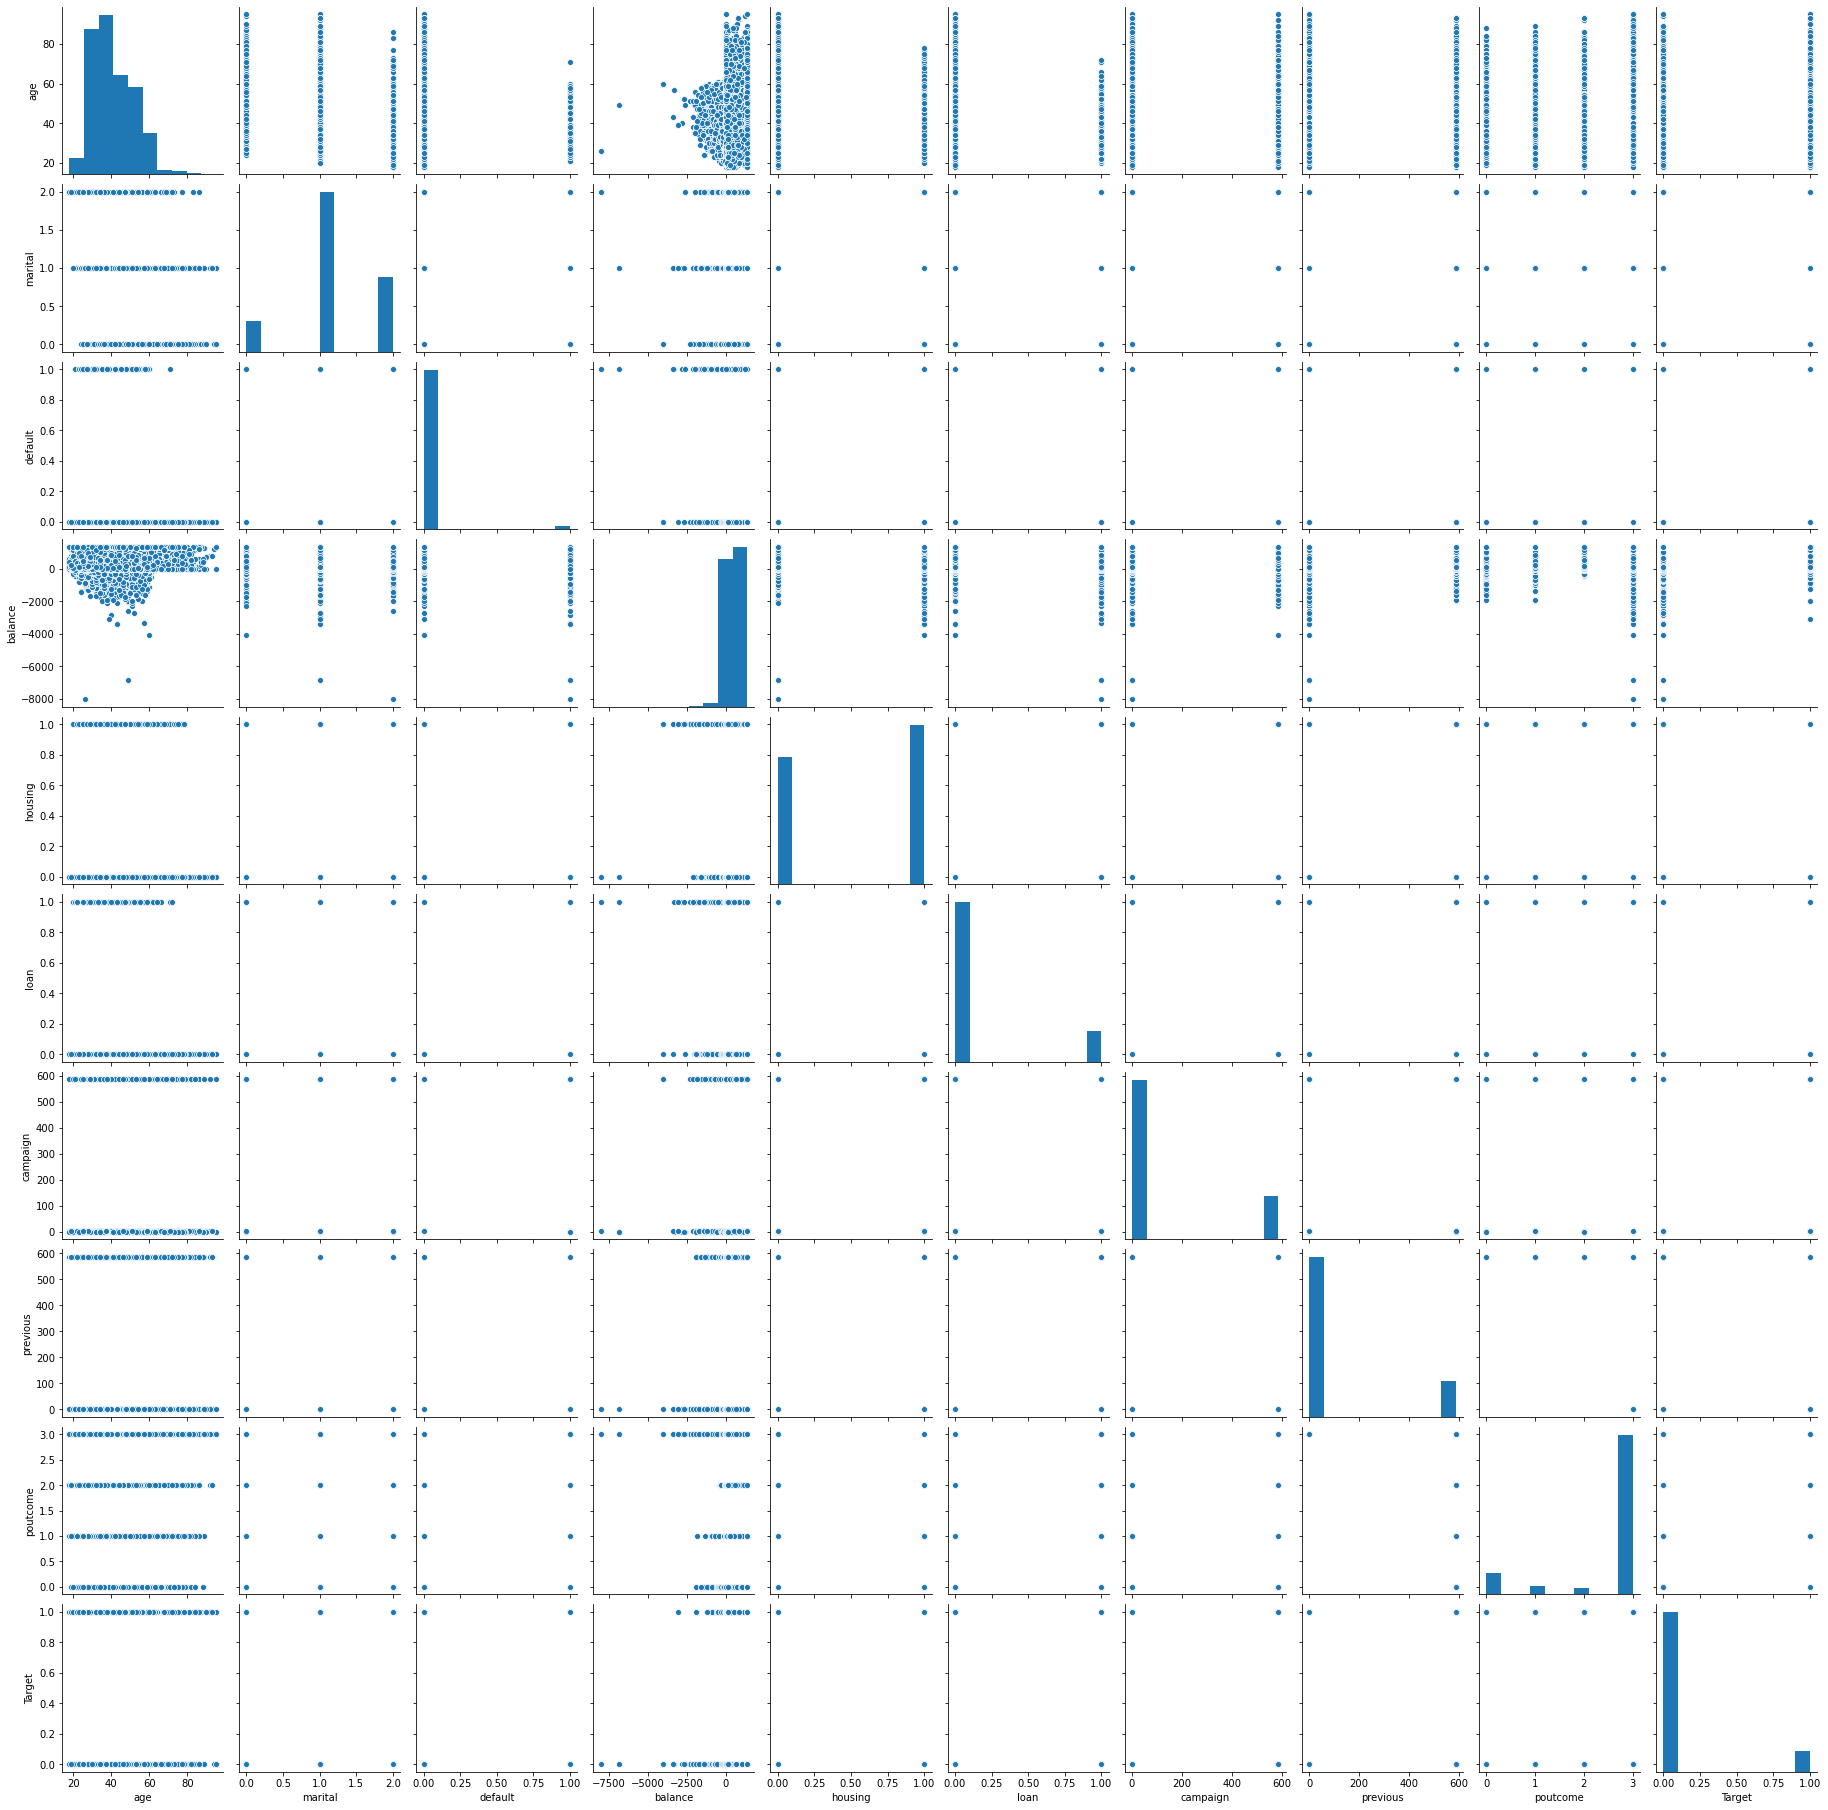

In [57]:
sns.pairplot(df2)

# Preprocessing

In [58]:
x = df2.drop('Target', axis=1)
y = df2.Target

In [60]:
x_train, x_test, y_train, y_test= train_test_split(x, y,test_size=0.3, random_state=2)

In [64]:
scaler = StandardScaler()
xtrain = scaler.fit_transform (x_train)
xtest = scaler.fit_transform (x_test)

# Modelling

### Logistic Regression

In [68]:
log = LogisticRegression (solver= 'liblinear')
log.fit (xtrain, y_train)
y_pred = log.predict (xtest)
log_accuracy = accuracy_score(y_test,y_pred)

print ('Confusion matrix\n', confusion_matrix(y_test,y_pred))
print ('Accuracy score\n', accuracy_score(y_test,y_pred))
print ('Classification report\n', classification_report(y_test,y_pred))

Confusion matrix
 [[11897   102]
 [ 1317   248]]
Accuracy score
 0.8953848422294308
Classification report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.71      0.16      0.26      1565

    accuracy                           0.90     13564
   macro avg       0.80      0.57      0.60     13564
weighted avg       0.88      0.90      0.86     13564



### Naive Bayes

In [70]:
nb = GaussianNB ()
nb.fit (xtrain, y_train)
y_pred = nb.predict (xtest)
nb_accuracy = accuracy_score(y_test,y_pred)

print ('Confusion matrix\n', confusion_matrix(y_test,y_pred))
print ('Accuracy score\n', accuracy_score(y_test,y_pred))
print ('Classification report\n', classification_report(y_test,y_pred))

Confusion matrix
 [[10626  1373]
 [ 1042   523]]
Accuracy score
 0.8219551754644647
Classification report
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     11999
           1       0.28      0.33      0.30      1565

    accuracy                           0.82     13564
   macro avg       0.59      0.61      0.60     13564
weighted avg       0.84      0.82      0.83     13564



### KNN

In [71]:
knn = KNeighborsClassifier (n_neighbors= 3)
knn.fit (xtrain, y_train)
y_pred = knn.predict (xtest)
knn_accuracy = accuracy_score(y_test,y_pred)

print ('Confusion matrix\n', confusion_matrix(y_test,y_pred))
print ('Accuracy score\n', accuracy_score(y_test,y_pred))
print ('Classification report\n', classification_report(y_test,y_pred))

Confusion matrix
 [[11488   511]
 [ 1234   331]]
Accuracy score
 0.8713506340312592
Classification report
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.39      0.21      0.28      1565

    accuracy                           0.87     13564
   macro avg       0.65      0.58      0.60     13564
weighted avg       0.84      0.87      0.85     13564



### SVC

In [74]:
svc = SVC ()
svc.fit (xtrain, y_train)
y_pred = svc.predict (xtest)
svc_accuracy = accuracy_score(y_test,y_pred)

print ('Confusion matrix\n', confusion_matrix(y_test,y_pred))
print ('Accuracy score\n', accuracy_score(y_test,y_pred))
print ('Classification report\n', classification_report(y_test,y_pred))

Confusion matrix
 [[11862   137]
 [ 1284   281]]
Accuracy score
 0.8952373930993807
Classification report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.67      0.18      0.28      1565

    accuracy                           0.90     13564
   macro avg       0.79      0.58      0.61     13564
weighted avg       0.88      0.90      0.87     13564



# Ensemble Models

### Decision Tree

In [77]:
dtree = DecisionTreeClassifier(criterion='gini', random_state= 5)
dtree.fit (xtrain, y_train)
y_pred = dtree.predict (xtest)
dtree_accuracy = accuracy_score(y_test,y_pred)

print ('Confusion matrix\n', confusion_matrix(y_test,y_pred))
print ('Accuracy score\n', accuracy_score(y_test,y_pred))
print ('Classification report\n', classification_report(y_test,y_pred))

Confusion matrix
 [[10862  1137]
 [ 1181   384]]
Accuracy score
 0.8291064582718962
Classification report
               precision    recall  f1-score   support

           0       0.90      0.91      0.90     11999
           1       0.25      0.25      0.25      1565

    accuracy                           0.83     13564
   macro avg       0.58      0.58      0.58     13564
weighted avg       0.83      0.83      0.83     13564



### Feature importance test for Decision Tree

In [80]:
xvar = df2.drop('Target', axis=1) 
feature_cols = xvar.columns 
feat_importance = dtree.tree_.compute_feature_importances(normalize=False) 


feat_imp_dict = dict(zip(feature_cols, dtree.feature_importances_)) 
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index') 
feat_imp.sort_values(by=0, ascending=False).T

,balance,age,poutcome,campaign,marital,previous,loan,housing,default
0,0.441156,0.264175,0.090318,0.070394,0.04532,0.034837,0.028634,0.020536,0.004629


### Bagging Model

In [82]:
bag = BaggingClassifier(base_estimator=dtree, n_estimators=500, random_state= 5)
bag.fit (xtrain, y_train)
y_pred = bag.predict (xtest)
bag_accuracy = accuracy_score(y_test,y_pred)

print ('Confusion matrix\n', confusion_matrix(y_test,y_pred))
print ('Accuracy score\n', accuracy_score(y_test,y_pred))
print ('Classification report\n', classification_report(y_test,y_pred))

Confusion matrix
 [[11551   448]
 [ 1241   324]]
Accuracy score
 0.8754792096726629
Classification report
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.42      0.21      0.28      1565

    accuracy                           0.88     13564
   macro avg       0.66      0.58      0.60     13564
weighted avg       0.85      0.88      0.86     13564



### Adaptive Boosting Model


In [83]:
ada = AdaBoostClassifier(n_estimators=50, random_state= 5)
ada.fit (xtrain, y_train)
y_pred = ada.predict (xtest)
ada_accuracy = accuracy_score(y_test,y_pred)

print ('Confusion matrix\n', confusion_matrix(y_test,y_pred))
print ('Accuracy score\n', accuracy_score(y_test,y_pred))
print ('Classification report\n', classification_report(y_test,y_pred))

Confusion matrix
 [[11892   107]
 [ 1324   241]]
Accuracy score
 0.8945001474491301
Classification report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.69      0.15      0.25      1565

    accuracy                           0.89     13564
   macro avg       0.80      0.57      0.60     13564
weighted avg       0.88      0.89      0.86     13564



### Gradient Boosting

In [85]:
gra = GradientBoostingClassifier(n_estimators=50, random_state= 5)
gra.fit (xtrain, y_train)
y_pred = gra.predict (xtest)
gra_accuracy = accuracy_score(y_test,y_pred)

print ('Confusion matrix\n', confusion_matrix(y_test,y_pred))
print ('Accuracy score\n', accuracy_score(y_test,y_pred))
print ('Classification report\n', classification_report(y_test,y_pred))

Confusion matrix
 [[11909    90]
 [ 1340   225]]
Accuracy score
 0.8945738720141552
Classification report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.71      0.14      0.24      1565

    accuracy                           0.89     13564
   macro avg       0.81      0.57      0.59     13564
weighted avg       0.88      0.89      0.86     13564



### Random Forest

In [84]:
rf = RandomForestClassifier(n_estimators=100, random_state= 5, max_features= 3)
rf.fit (xtrain, y_train)
y_pred = rf.predict (xtest)
rf_accuracy = accuracy_score(y_test,y_pred)

print ('Confusion matrix\n', confusion_matrix(y_test,y_pred))
print ('Accuracy score\n', accuracy_score(y_test,y_pred))
print ('Classification report\n', classification_report(y_test,y_pred))

Confusion matrix
 [[11543   456]
 [ 1237   328]]
Accuracy score
 0.8751843114125627
Classification report
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.42      0.21      0.28      1565

    accuracy                           0.88     13564
   macro avg       0.66      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



# Accuracy Scores of all Models

In [89]:
scores = [('Logistic Regression', log_accuracy),
         ('Naive Bayes', nb_accuracy),
         ('KNN', knn_accuracy),
         ('SVC', svc_accuracy),
         ('Decision Tree', dtree_accuracy),
         ('Bagging', bag_accuracy),
         ('Adaptive Boosting', ada_accuracy),
          ('Gradient Boosting', gra_accuracy),
         ('Random Forest', rf_accuracy)]

scores =  pd.DataFrame(scores, columns=['Models', 'Accuracy Score'])

print('\033[1m''Current Scores with Outliers replaced with mean:')
scores.sort_values(by='Accuracy Score',ascending=False)

Current Scores with Outliers replaced with mean:


,Models,Accuracy Score
0,Logistic Regression,0.895385
3,SVC,0.895237
7,Gradient Boosting,0.894574
6,Adaptive Boosting,0.894500
5,Bagging,0.875479
8,Random Forest,0.875184
2,KNN,0.871351
4,Decision Tree,0.829106
1,Naive Bayes,0.821955


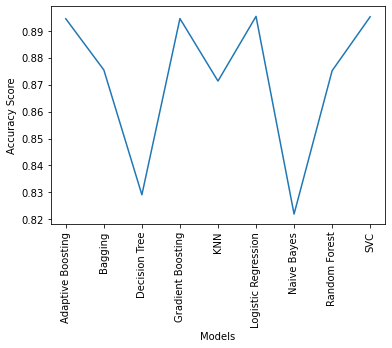

In [91]:
sns.lineplot(x= scores['Models'], y=scores['Accuracy Score'], data=scores, markers=True, dashes=False) 
plt.xticks(rotation=90)
plt.show()

# Conclusion

* The models perform well in predicting class 0, where customer does not subscribe to term deposit. 
* On the other hand, the models do not perform well in predicting class 1, where customer subscribe to term deposit. 
* This situation is due the imbalanced dataset between class 0 and 1
* Along with imbalanced datset, it also contained large number of unknown string values in 'job','education','contact' and 'poutcome' features.